In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spstats

%matplotlib inline

In [2]:
poke_df = pd.read_csv('../input/Pokemon.csv', encoding='utf-8') 
poke_df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [3]:
poke_df.shape

(800, 12)

## 连续型特征
Pokemon 的 HP（血量），Attack （攻击）和 Defense（防御）状态。

In [4]:
poke_df[['HP', 'Attack', 'Defense']].head()

,HP,Attack,Defense
0,45,49,49
1,60,62,63
2,80,82,83
3,80,100,123
4,39,52,43


In [5]:
# 数值特征形式的基本描述性统计量
poke_df[['HP', 'Attack', 'Defense']].describe()

,HP,Attack,Defense
count,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500
std,25.534669,32.457366,31.183501
min,1.000000,5.000000,5.000000
25%,50.000000,55.000000,50.000000
50%,65.000000,75.000000,70.000000
75%,80.000000,100.000000,90.000000
max,255.000000,190.000000,230.000000


In [6]:
atk_def = poke_df[['Attack', 'Defense']]
atk_def.head()

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


In [7]:
np.set_printoptions(suppress=True)

In [8]:
from sklearn.preprocessing import PolynomialFeatures

pf1 = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
res1 = pf1.fit_transform(atk_def)
res1

array([[   49.,    49.,  2401.,  2401.,  2401.],
       [   62.,    63.,  3844.,  3906.,  3969.],
       [   82.,    83.,  6724.,  6806.,  6889.],
       ...,
       [  110.,    60., 12100.,  6600.,  3600.],
       [  160.,    60., 25600.,  9600.,  3600.],
       [  110.,   120., 12100., 13200., 14400.]])

In [9]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
res = pf.fit_transform(atk_def)

In [10]:
res.shape

(800, 6)

In [11]:
res

array([[    1.,    49.,    49.,  2401.,  2401.,  2401.],
       [    1.,    62.,    63.,  3844.,  3906.,  3969.],
       [    1.,    82.,    83.,  6724.,  6806.,  6889.],
       ...,
       [    1.,   110.,    60., 12100.,  6600.,  3600.],
       [    1.,   160.,    60., 25600.,  9600.,  3600.],
       [    1.,   110.,   120., 12100., 13200., 14400.]])

In [12]:
pf.powers_

array([[0, 0],
       [1, 0],
       [0, 1],
       [2, 0],
       [1, 1],
       [0, 2]])

---

## millionsong 数据集

In [13]:
popsong_df = pd.read_csv('../input/song_views.csv', encoding='utf-8')
popsong_df.head(10)

,user_id,song_id,title,listen_count
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0


In [14]:
popsong_df['watched'] = popsong_df['listen_count'].map(
    lambda x: 1 if x > 0 else 0)
popsong_df.head()

,user_id,song_id,title,listen_count,watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0


In [15]:
watched = np.array(popsong_df['listen_count'])

In [16]:
watched[watched >= 1] = 1

In [17]:
popsong_df['watched2'] = watched

In [18]:
popsong_df

,user_id,song_id,title,listen_count,watched,watched2
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0,0,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17,1,1
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0,0,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68,1,1
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0,0,0


## 二值化 Binarizer，没有 fit 

In [19]:
from sklearn.preprocessing import Binarizer

bn = Binarizer(threshold=0.9)
pd_watched = bn.transform(popsong_df[['listen_count']])

In [20]:
popsong_df['pd_watched'] = pd_watched

In [21]:
popsong_df.columns

Index(['user_id', 'song_id', 'title', 'listen_count', 'watched', 'watched2',
       'pd_watched'],
      dtype='object')

In [22]:
popsong_df

,user_id,song_id,title,listen_count,watched,watched2,pd_watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1,1,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0,0,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0,0,0,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17,1,1,1
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0,0,0,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68,1,1,1
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0,0,0,0


In [23]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures


X = np.arange(6).reshape(3, 2)
X 

array([[0, 1],
       [2, 3],
       [4, 5]])

In [24]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [25]:
# 输出的 6 的特征来自原来的 2 个特征的次数
poly.powers_

array([[0, 0],
       [1, 0],
       [0, 1],
       [2, 0],
       [1, 1],
       [0, 2]])

+ [0, 0] 新特征由原始特征这样组成： $a^0\cdot b^0$，其实就是 1；
+ [1, 0] 新特征由原始特征这样组成： $a^1\cdot b^0$，其实就是 $a$ 这一列；
+ [0, 1] 新特征由原始特征这样组成： $a^0\cdot b^1$，其实就是 $b$ 这一列；
+ [2, 0] 新特征由原始特征这样组成： $a^2\cdot b^0$，其实就是 $a^2$；
+ [1, 1] 新特征由原始特征这样组成： $a^1\cdot b^1$，其实就是 $a\cdot b$；
+ [0, 2] 新特征由原始特征这样组成： $a^0\cdot b^2$，其实就是 $b^2$；



In [26]:
poly.n_input_features_

2

In [27]:
poly.n_output_features_

6

In [28]:
# interaction_only 表示只有交叉项，没有平方项
X = np.arange(6).reshape(2, 3)
poly = PolynomialFeatures(degree=4, interaction_only=True)  # 同一个自己只能出现一次

In [29]:
X

array([[0, 1, 2],
       [3, 4, 5]])

In [30]:
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  2.,  0.,  0.,  2.,  0.],
       [ 1.,  3.,  4.,  5., 12., 15., 20., 60.]])

In [31]:
poly.powers_

array([[0, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 1, 0],
       [1, 0, 1],
       [0, 1, 1],
       [1, 1, 1]])

In [32]:
poly = PolynomialFeatures(degree=1)
poly.fit_transform(X)

array([[1., 0., 1., 2.],
       [1., 3., 4., 5.]])

In [33]:
poly.powers_

array([[0, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [34]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def f(x):
    return x*np.sin(x)

In [35]:
x_plot = np.linspace(0, 10, 100)
x = np.linspace(0, 10, 100)

In [36]:
rng = np.random.RandomState(0)

In [37]:
rng.shuffle(x)

In [38]:
x_plot

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [39]:
x

array([ 2.62626263,  8.68686869,  0.2020202 ,  5.55555556,  7.57575758,
        9.39393939,  1.61616162,  7.37373737,  5.45454545,  9.5959596 ,
        5.35353535,  9.29292929,  7.87878788,  1.31313131,  0.70707071,
        3.03030303,  2.22222222,  2.42424242,  3.33333333,  0.80808081,
        4.34343434,  6.26262626,  0.3030303 ,  7.17171717,  4.54545455,
        4.84848485,  0.60606061, 10.        ,  8.28282828,  7.67676768,
        6.06060606,  8.08080808,  9.09090909,  6.86868687,  5.15151515,
        2.72727273,  1.81818182,  5.65656566,  6.36363636,  7.47474747,
        0.1010101 ,  6.16161616,  4.24242424,  4.14141414,  0.4040404 ,
        1.51515152,  1.71717172,  4.04040404,  3.83838384,  0.50505051,
        9.19191919,  5.95959596,  0.        ,  3.43434343,  2.82828283,
        5.05050505,  1.11111111,  3.53535354,  2.32323232,  5.25252525,
        1.01010101,  3.13131313,  6.66666667,  5.75757576,  7.97979798,
        8.58585859,  3.23232323,  8.48484848,  1.41414141,  8.98

In [40]:
x = np.sort(x[:20])
y = f(x)

In [41]:
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

In [42]:
colors = ['teal', 'yellowgreen', 'gold']
lw = 2

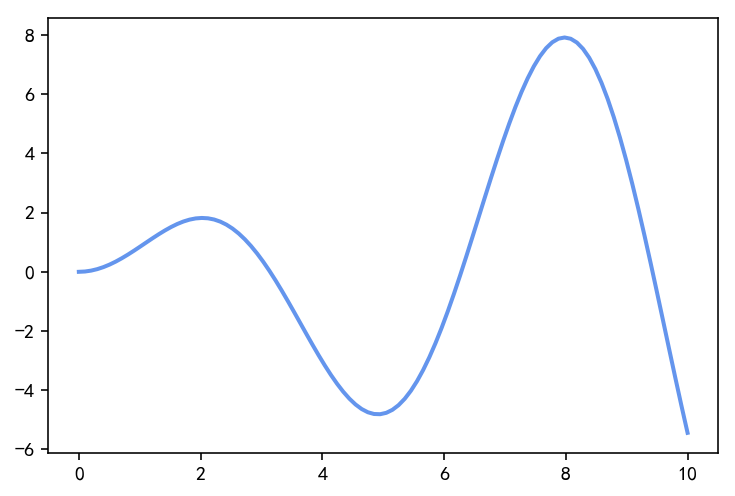

In [43]:
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw, label="ground truth")
plt.show()

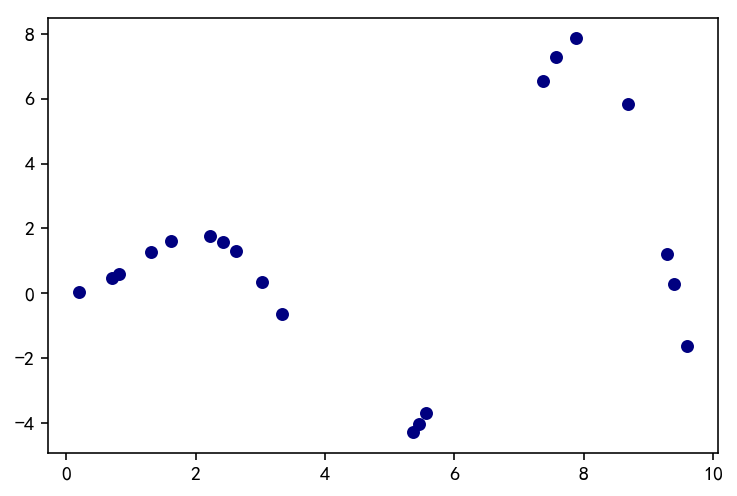

In [44]:
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")
plt.show()

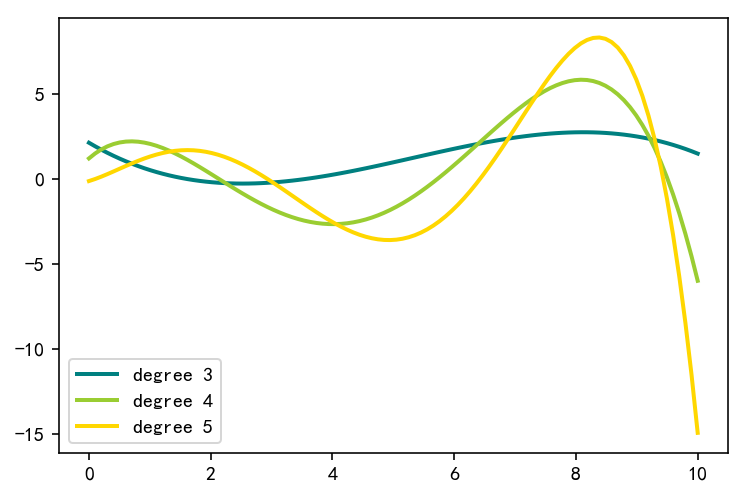

In [45]:
for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')

plt.show()

In [47]:
fcc_survey_df = pd.read_csv(
    '../input/fcc_2016_coder_survey_subset.csv', encoding='utf-8')
fcc_survey_df.head()

,ID.x,Age,ChildrenNumber,CountryCitizen,EmploymentField,EmploymentStatus,ExpectedEarning,Gender,Income,JobPref,JobRoleInterest,LanguageAtHome,MaritalStatus,SchoolDegree,StudentDebtOwe
0,cef35615d61b202f1dc794ef2746df14,28.0,NaN,United States of America,office and administrative support,Employed for wages,NaN,male,32000.0,freelance,NaN,English,married or domestic partnership,"some college credit, no degree",20000.0
1,323e5a113644d18185c743c241407754,22.0,NaN,United States of America,food and beverage,Employed for wages,50000.0,male,15000.0,work for a startup,Front-End Web Developer,English,NaN,"some college credit, no degree",NaN
2,b29a1027e5cd062e654a63764157461d,19.0,NaN,United States of America,finance,Employed for wages,NaN,male,48000.0,start your own business,NaN,English,NaN,high school diploma or equivalent (GED),NaN
3,04a11e4bcb573a1261eb0d9948d32637,26.0,NaN,United States of America,"arts, entertainment, sports, or media",Employed for wages,65000.0,female,43000.0,work for a startup,Front-End Web Developer,English,NaN,bachelor's degree,7000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,NaN,United States of America,education,Employed for wages,45000.0,female,6000.0,work for a medium-sized company,Full-Stack Web Developer,Khmer,NaN,"some college credit, no degree",NaN


In [48]:
fcc_survey_df[['ID.x', 'EmploymentField', 'Age','Income']].head()

,ID.x,EmploymentField,Age,Income
0,cef35615d61b202f1dc794ef2746df14,office and administrative support,28.0,32000.0
1,323e5a113644d18185c743c241407754,food and beverage,22.0,15000.0
2,b29a1027e5cd062e654a63764157461d,finance,19.0,48000.0
3,04a11e4bcb573a1261eb0d9948d32637,"arts, entertainment, sports, or media",26.0,43000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,education,20.0,6000.0


Text(0, 0.5, 'Frequency')

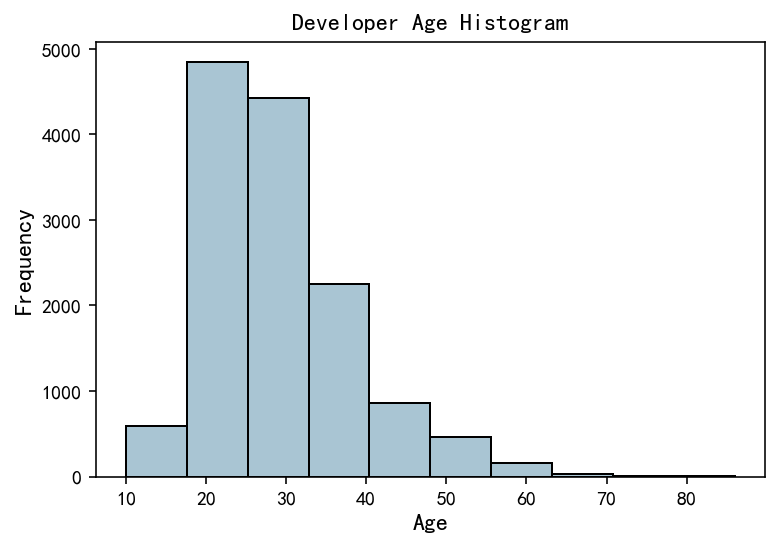

In [49]:
fig, ax = plt.subplots()

fcc_survey_df['Age'].hist(color='#A9C5D3', edgecolor='black', grid=False)
ax.set_title('Developer Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [50]:
fcc_survey_df['Age_bin_round'] = np.array(np.floor(np.array(fcc_survey_df['Age']) / 10.))
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round']].iloc[1071:1076]

,ID.x,Age,Age_bin_round
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0


In [51]:
bin_ranges = [0, 15, 30, 45, 60, 75, 100]

bin_names = [1, 2, 3, 4, 5, 6]

fcc_survey_df['Age_bin_custom_range'] = pd.cut(
    np.array(fcc_survey_df['Age']), bins=bin_ranges)

fcc_survey_df['Age_bin_custom_label'] = pd.cut(
    np.array(fcc_survey_df['Age']), bins=bin_ranges, labels=bin_names)

# view the binned features

fcc_survey_df[['ID.x', 'Age', 'Age_bin_round', 'Age_bin_custom_range', 'Age_bin_custom_label']].iloc[1071:1076]

,ID.x,Age,Age_bin_round,Age_bin_custom_range,Age_bin_custom_label
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0,"(15, 30]",2
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0,"(30, 45]",3
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0,"(15, 30]",2
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0,"(45, 60]",4
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0,"(30, 45]",3
